In [1]:
from chi_square import chi2_analyze_image
from LSB import generate_random_bits, lsb_steganography, extrac_data, text_to_bits, POSITIVE, RANDOM
from utils import image_to_histogram, images_embedding_rate_chi_square_p, images_h_2i_histogram
from PIL import Image
import numpy as np

### 图像隐写
##### 由于隐写数据往往经过加密，而密码学算法要求生成的密钥尽可能的服从随机分布
##### 因此可以使用随机生成的比特串代替

In [2]:
image_path = './data/lenna.jpg'
save_path = './data/lenna_lsb.png'
save_dir = './data/lsb'

In [3]:
image = Image.open(image_path)
image_array = np.array(image.getdata()).flatten()
len_pixels = len(image_array)

##### test

In [4]:
flag = '1557'
flag_bits = text_to_bits(flag)
len_flag = len(flag_bits)
data = generate_random_bits(length=len_pixels-len_flag)
# data = text_to_bits('here is some message')
bits = data+flag_bits

In [5]:
lsb_steganography(image_path, bits, save_path, mask_type=POSITIVE)
ret = extrac_data(save_path, flag, mask_type=POSITIVE)
ret == data

True

#### 绘制直方图

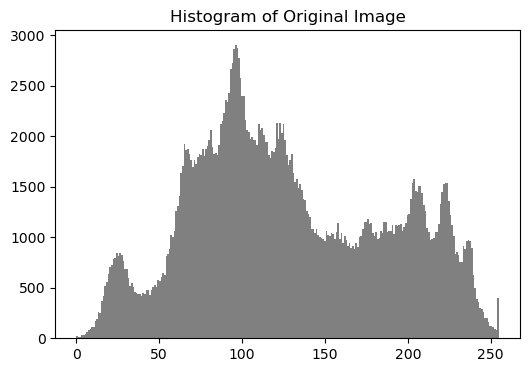

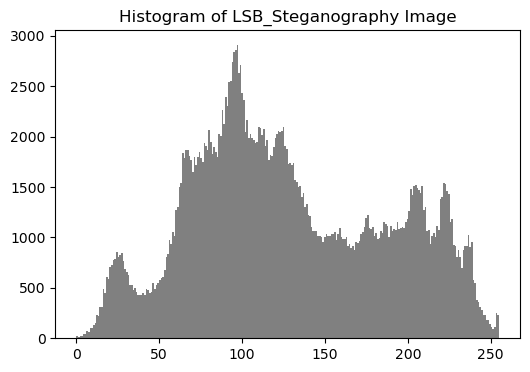

In [7]:
image_to_histogram(image_path, title='Histogram of Original Image', save_path='./data/original.svg')
image_to_histogram(save_path, title='Histogram of LSB_Steganography Image', save_path='./data/lsb.svg')

#### 卡方检测

In [8]:
chi2_static, p_value = chi2_analyze_image(image_path)
print('卡方统计量：', chi2_static)
print('显著值：', p_value)

卡方统计量： 295.2349948341703
显著值： 1.9984014443252818e-15


In [9]:
chi2_static, p_value = chi2_analyze_image(save_path)
print('卡方统计量：', chi2_static)
print('显著值：', p_value)

卡方统计量： 69.8287030940385
显著值： 0.9999911212093452


##### 统计分析

In [10]:
embedding_rates = np.linspace(0, 1, 100)

In [11]:
for i, embedding_rate in enumerate(embedding_rates):
    flag = '1557'
    flag_bits = text_to_bits(flag)
    len_flag = len(flag_bits)
    data_bits = generate_random_bits(length=int(len_pixels*embedding_rate - len_flag))
    embedding_bits = data_bits+flag_bits
    lsb_steganography(image_path, embedding_bits, save_dir + f'/lsb_{i}.png', mask_type=POSITIVE)

In [14]:
image_paths = []
for i in range(100):
    image_paths.append(save_dir+f'/lsb_{i}.png')

##### h_2i - h_2i+1

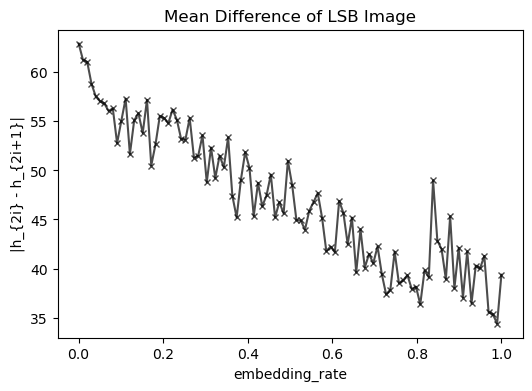

In [15]:
images_h_2i_histogram(image_paths, embedding_rates, color='black', alpha=0.7, marksize=5, save_path='./data/diff.svg')

#### P-value

In [16]:
chi_test_stat = []
chi_test_p = []
for path in image_paths:
    stat, p = chi2_analyze_image(path)
    chi_test_stat.append(stat)
    chi_test_p.append(p)

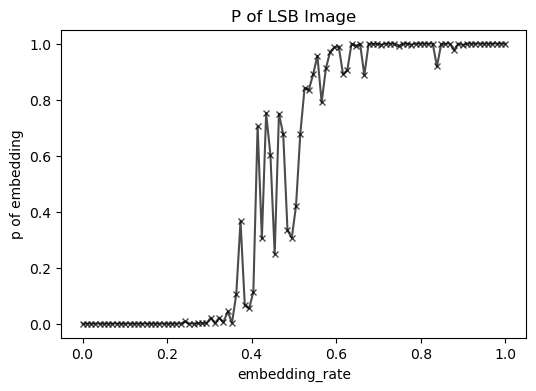

In [17]:
images_embedding_rate_chi_square_p(chi_test_p, embedding_rates, color='black', y_label='p of embedding', alpha=0.7, marksize=5, save_path='./data/p.svg')

#### random LSB

In [21]:
flag = '1557'
flag_bits = text_to_bits(flag)
len_flag = len(flag_bits)
data = generate_random_bits(length=len_pixels-len_flag)
bits = data+flag_bits

In [22]:
lsb_steganography(image_path, bits, save_path, mask_type=RANDOM, seed=57)
ret = extrac_data(save_path, flag, mask_type=RANDOM, seed=57)
ret == data

True

##### 统计分析

In [32]:
embedding_rates = np.linspace(0, 1, 100)

In [33]:
for i, embedding_rate in enumerate(embedding_rates):
    flag = '1557'
    flag_bits = text_to_bits(flag)
    len_flag = len(flag_bits)
    data_bits = generate_random_bits(length=int(len_pixels*embedding_rate - len_flag))
    embedding_bits = data_bits+flag_bits
    lsb_steganography(image_path, embedding_bits, save_dir + f'/random/lsb_{i}.png', mask_type=RANDOM, seed=1024)

In [34]:
image_paths = []
for i in range(100):
    image_paths.append(save_dir+f'/random/lsb_{i}.png')

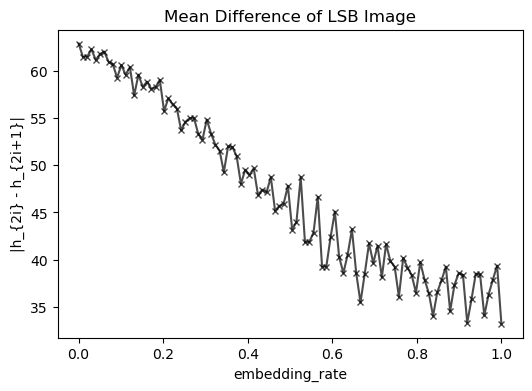

In [36]:
images_h_2i_histogram(image_paths, embedding_rates, color='black', alpha=0.7, marksize=5, save_path='./data/random_diff.svg')

In [37]:
chi_test_stat = []
chi_test_p = []
for path in image_paths:
    stat, p = chi2_analyze_image(path)
    chi_test_stat.append(stat)
    chi_test_p.append(p)

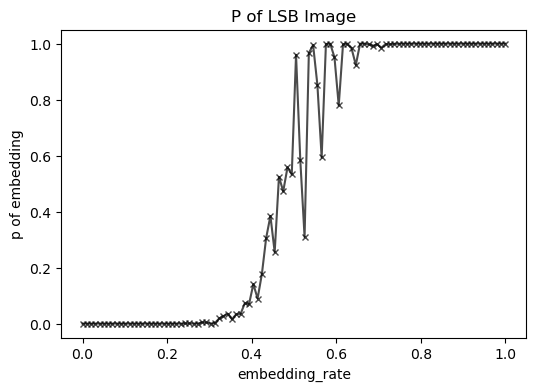

In [38]:
images_embedding_rate_chi_square_p(chi_test_p, embedding_rates, color='black', y_label='p of embedding', alpha=0.7, marksize=5, save_path='./data/random_p.svg')